# Import Module

In [1]:
import pickle
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
dates = range(19,30)

In [2]:
with open('./filtered_daily/df_topic_sent_tweets_filtered_subset_1.pickle', 'rb') as handle:
    df_topic_sent = pickle.load(handle)
with open('./filtered_daily/df_topic_sent_news_filtered_subset_1.pickle', 'rb') as handle:
    df_topic_sent_news = pickle.load(handle)

In [6]:
df_topic_sent_news.day.unique()

array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

# Overall Visulization

In [7]:
df_topic_sent.iloc[:,5].sum(),df_topic_sent_news.iloc[:,5].sum()

(1904002, 1592310)

Text(0.5,0,'News')

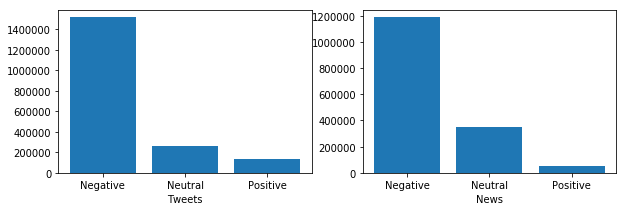

In [8]:
plt.figure(figsize=(10, 3))
plt.subplot('121')
plt.bar(('Negative','Neutral','Positive'),df_topic_sent.iloc[:,1:4].sum())
plt.xlabel('Tweets')
plt.subplot('122')
plt.bar(('Negative','Neutral','Positive'),df_topic_sent_news.iloc[:,1:4].sum())
plt.xlabel('News')

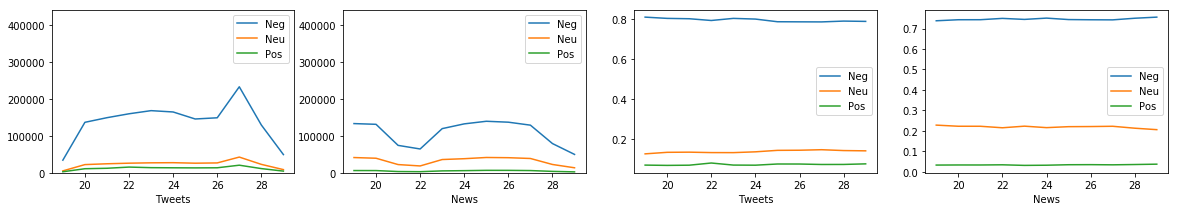

In [9]:
plt.figure(figsize=(20, 3))
plt.subplot('141')
plt.plot(df_topic_sent.groupby('day').sum().iloc[:,1:4])
plt.ylim(0,440000)
plt.xlabel('Tweets')
plt.legend(['Neg','Neu','Pos'])
plt.subplot('142')
plt.plot(df_topic_sent_news.groupby('day').sum().iloc[:,1:4])
plt.ylim(0,440000)
plt.xlabel('News')
plt.legend(['Neg','Neu','Pos'])
plt.subplot('143')
day = df_topic_sent.groupby('day').sum()
plt.plot(day[0]/day['total'])
plt.plot(day[1]/day['total'])
plt.plot(day[2]/day['total'])
plt.xlabel('Tweets')
plt.legend(['Neg','Neu','Pos'])
plt.subplot('144')
day = df_topic_sent_news.groupby('day').sum()
plt.plot(day[0]/day['total'])
plt.plot(day[1]/day['total'])
plt.plot(day[2]/day['total'])
plt.xlabel('News')
plt.legend(['Neg','Neu','Pos'])

In [10]:
for df in [df_topic_sent,df_topic_sent_news]:
    t = df.iloc[:,1:4].sum()
    print((t[2]-t[0])/(t.sum()))

-0.7257355822105229
-0.7100796955366732


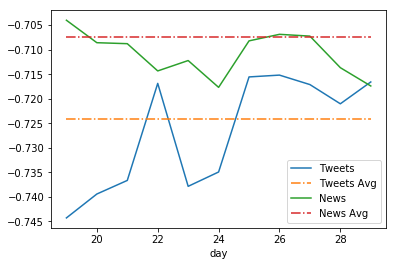

In [11]:
# Overall all sentiment score against each day
tweets_sent = df_topic_sent.groupby('day').sum()
((tweets_sent[2]-tweets_sent[0])/tweets_sent['total']).plot()
plt.plot(dates,[-0.7241553175732811 for d in dates], linestyle="-." )
news_sent = df_topic_sent_news.groupby('day').sum()
((news_sent[2]-news_sent[0])/news_sent['total']).plot()
plt.plot(dates,[-0.7073607721322387 for d in dates], linestyle="-." )
plt.legend(['Tweets','Tweets Avg','News','News Avg'])

# Topic Count of each Sentiment

Text(0.5,0,'News')

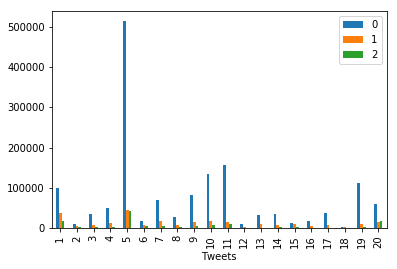

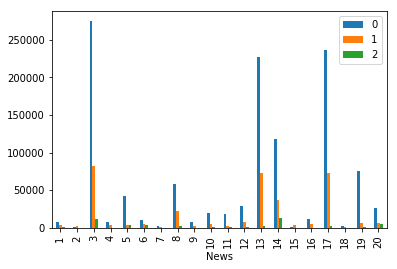

In [12]:
#由于存在无法map topics 和 sent的，所以现在tweets和new数量不一致
plt.figure(figsize=(10, 3))
df_topic_sent.groupby('TopicID').sum().iloc[:,:3].plot.bar()
plt.xlabel('Tweets')
df_topic_sent_news.groupby('TopicID').sum().iloc[:,:3].plot.bar()
plt.xlabel('News')

In [13]:
def multi_subplot(w=15,h=12,d='bar',dfs=df_topic_sent):
    plt.figure(1,figsize=(w, h))
    for i in range(3):
        plt.subplot(f'14{i+1}')
        count = dfs.groupby('TopicID')[i].sum()
        if d=='bar':
            count.plot.bar()
        elif d=='pie':
            count.sort_index().plot.pie()
    #     plt.legend(loc='best', shadow=True)
        plt.title('Topics Count when sentiment is '+ str(i))
    plt.subplot(f'144')
    topic_total = dfs.groupby('TopicID').sum()
    ((topic_total[2]-topic_total[0])/topic_total['total']).plot.bar()
#     dfs.groupby('TopicID')['TopicScore'].sum().plot.bar()
    plt.title('Topics Sentiment Scores')

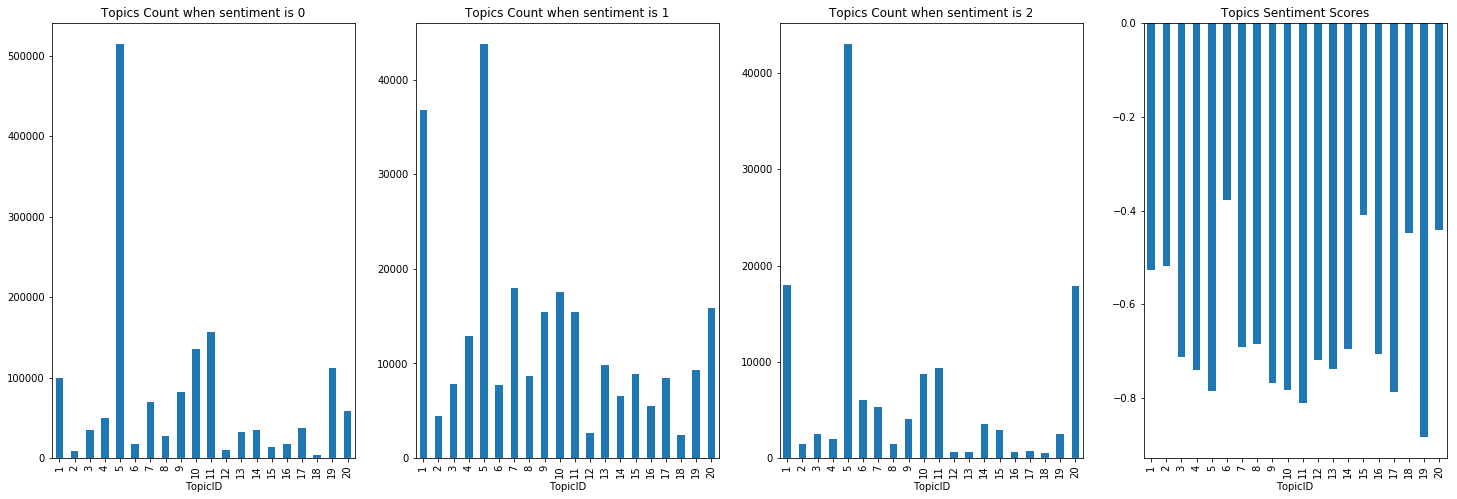

In [14]:
multi_subplot(w=25,h=8,dfs=df_topic_sent)

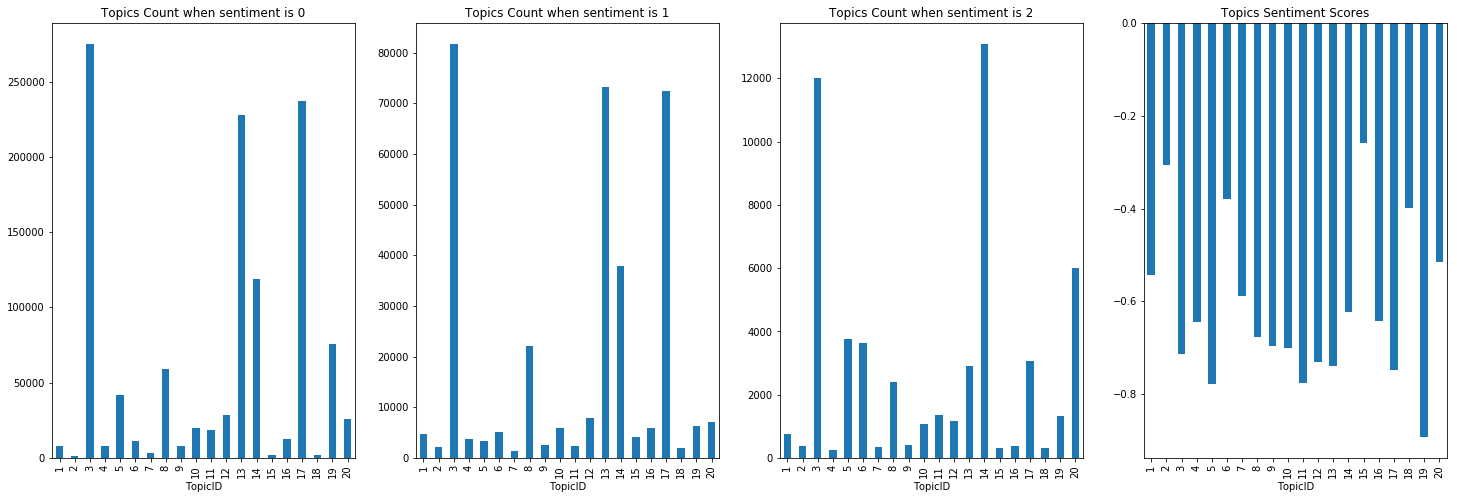

In [15]:
multi_subplot(w=25,h=8,dfs=df_topic_sent_news)

In [16]:
def multi_subplot20(w=15,h=12,d='bar',dfs=df_topic_sent):
    plt.figure(1,figsize=(w, h))
    for i in range(7):
        for j in range(3):
            plt.subplot2grid((7,3), (i,j))
            count = dfs[dfs.day==dates[i]][j]
            if d=='bar':
                pic=count.plot.bar()
                plt.xticks(range(20),range(1,21))
            elif d=='pie':
                pic=count.sort_index().plot.pie(labels=range(1,21))
#                 plt.legend(range(1,21))
#             pic.set_ylim(0,120000)
            plt.title('Topics Count when sentiment is '+ str(j))
            plt.ylabel(f'Day {i+1}')

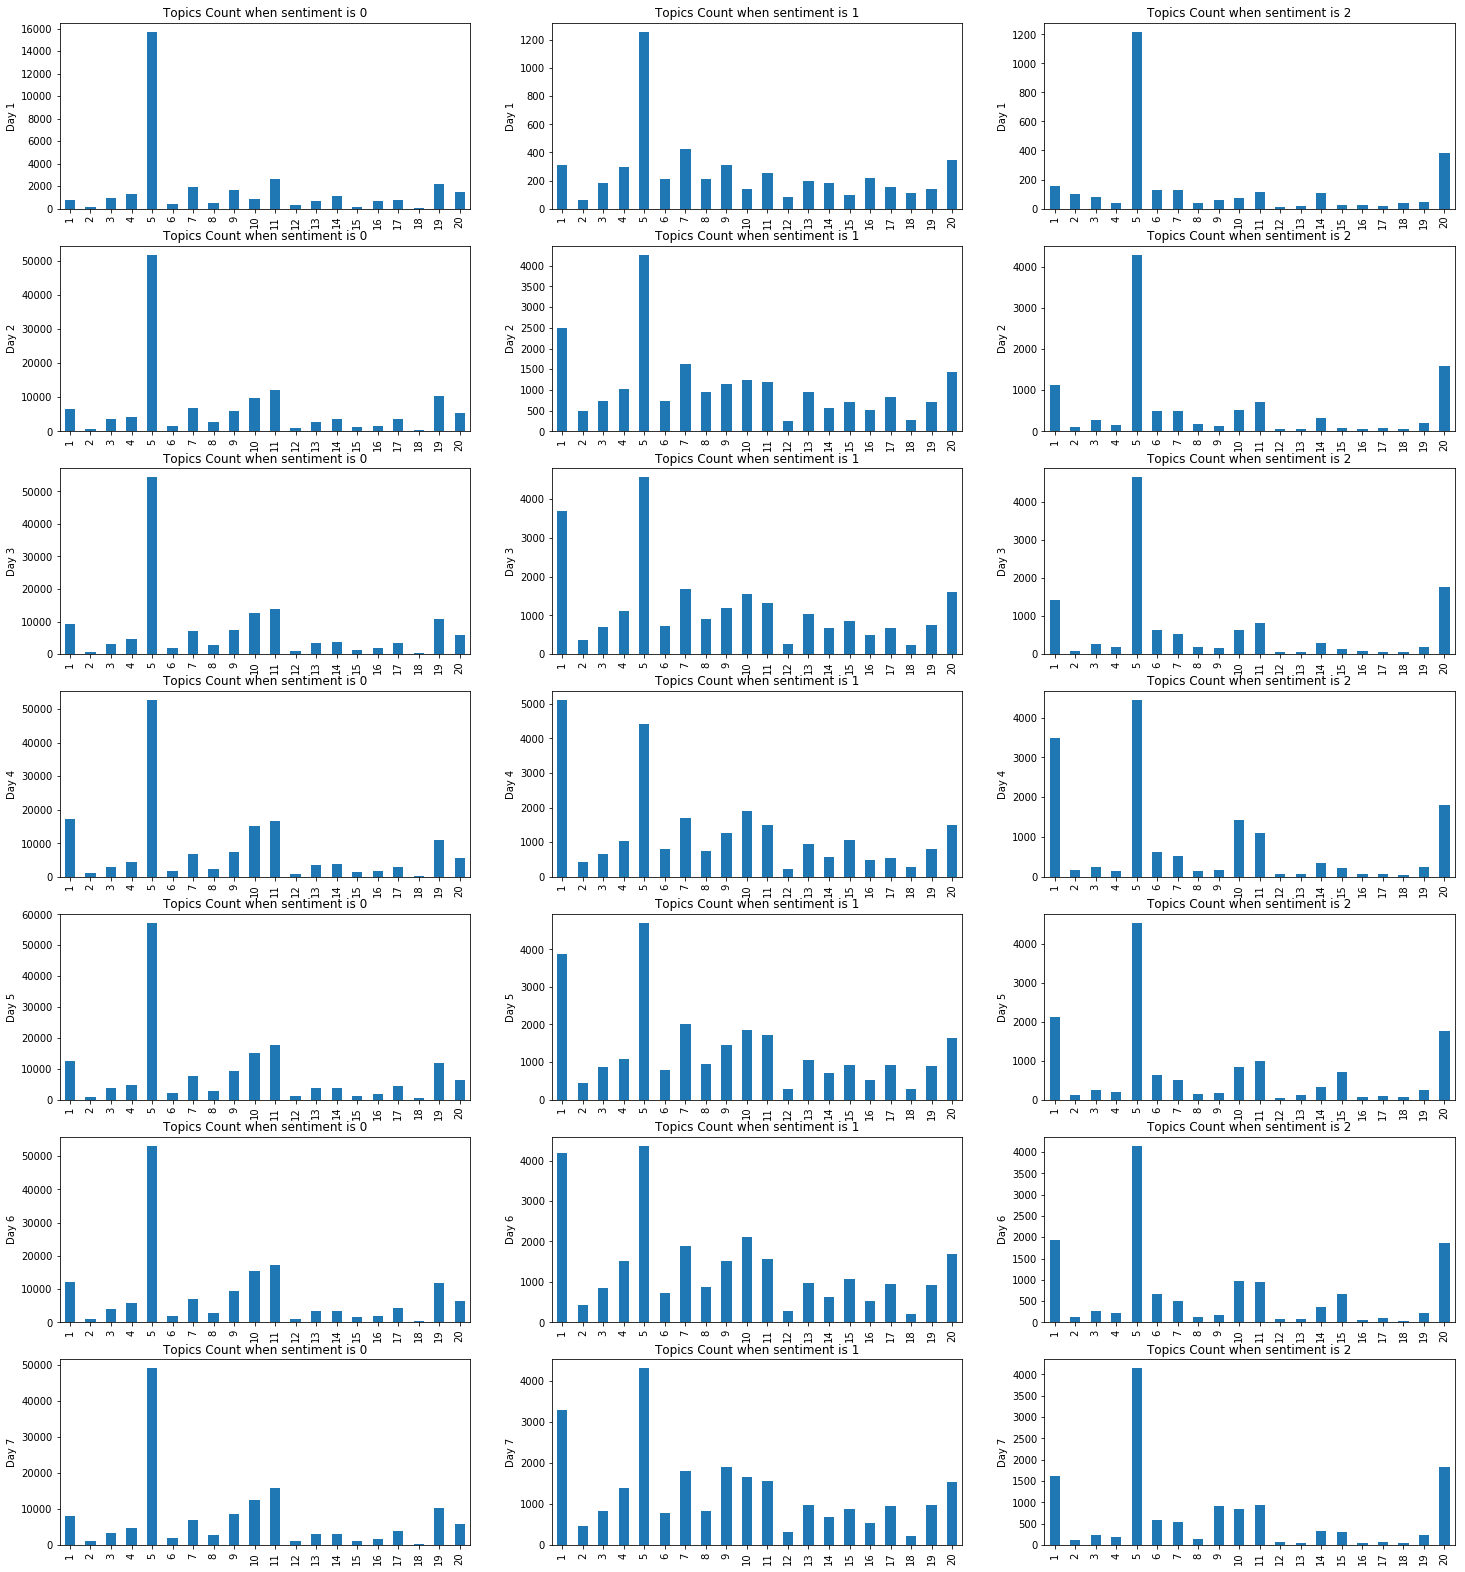

In [17]:
multi_subplot20(w=25,h=28,dfs=df_topic_sent)

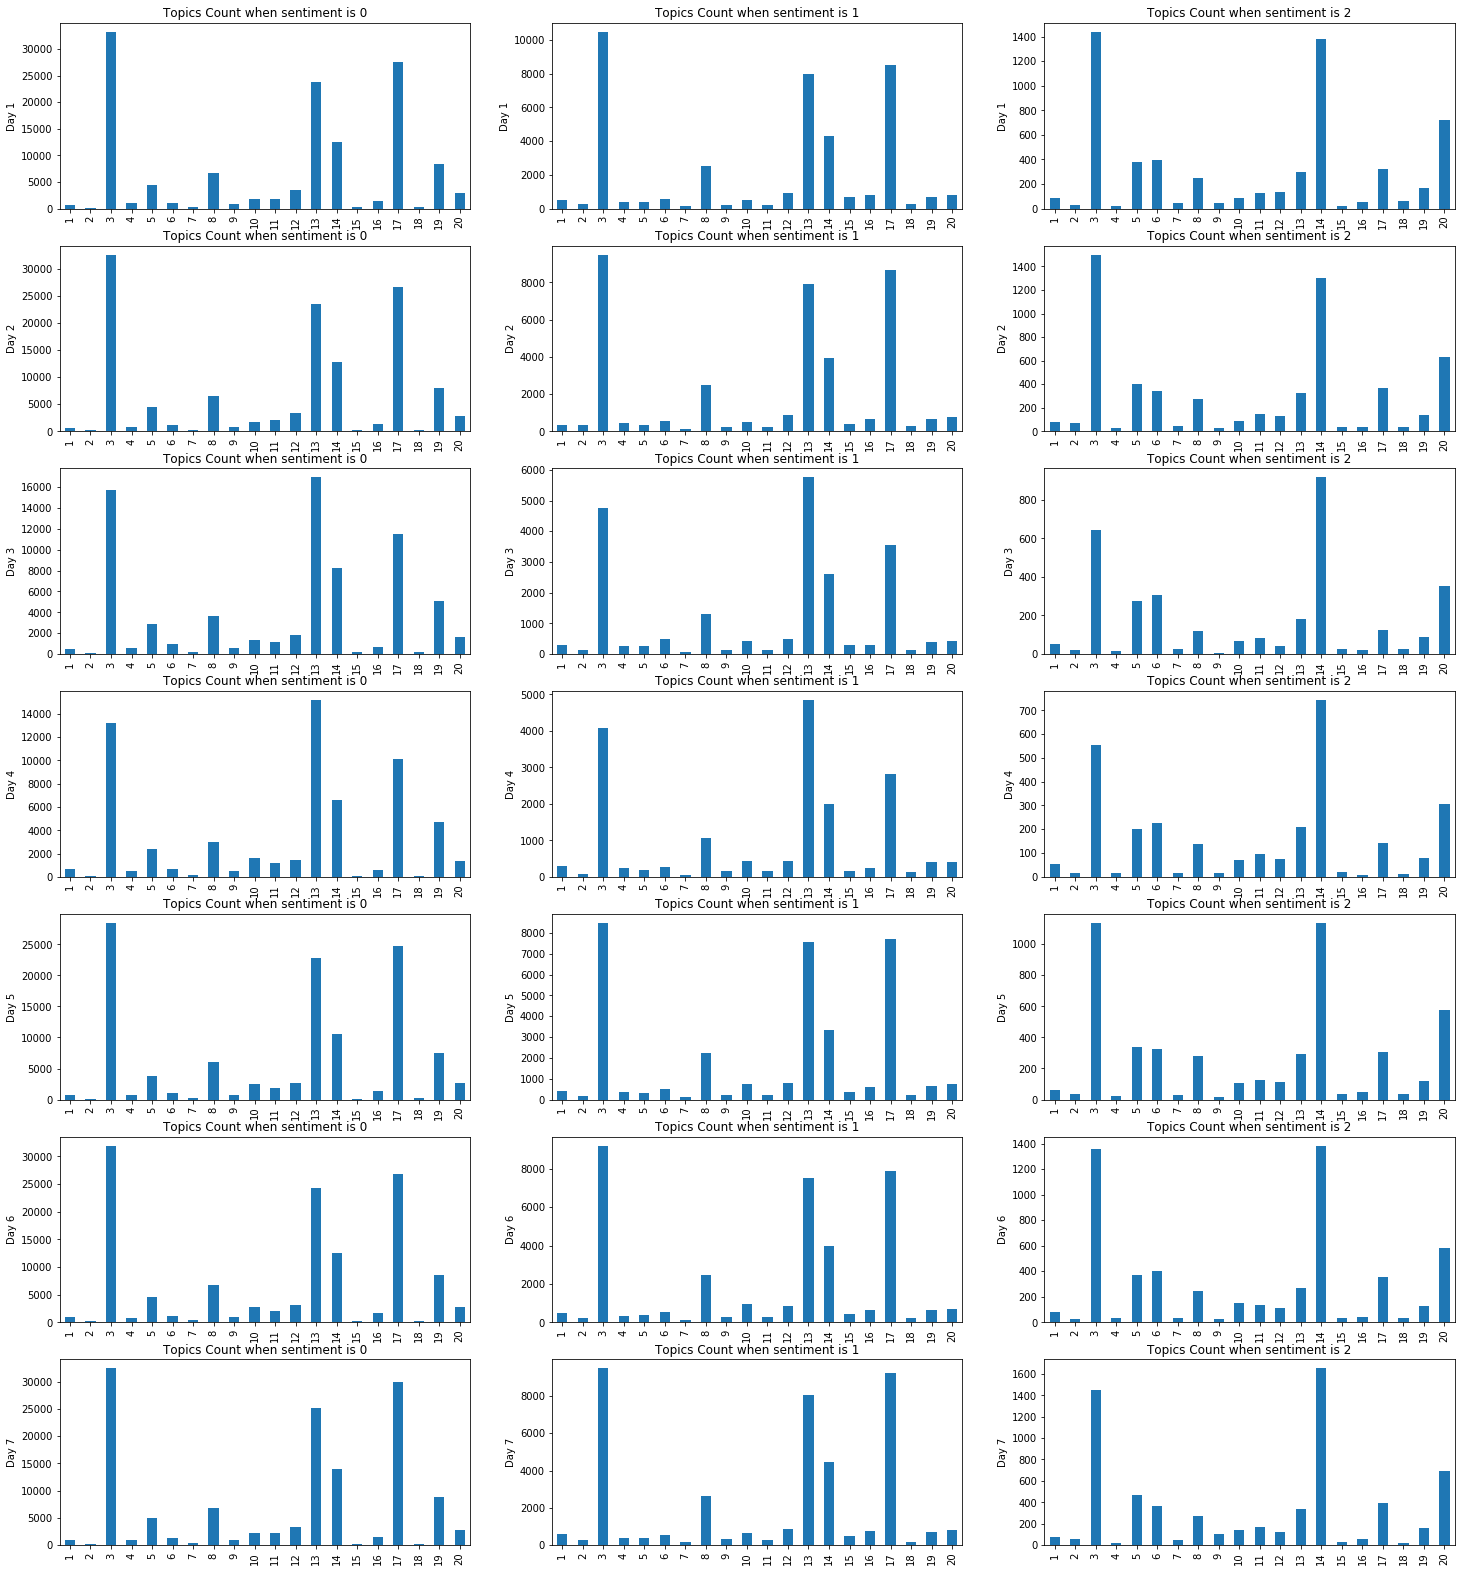

In [18]:
multi_subplot20(w=25,h=28,dfs=df_topic_sent_news)

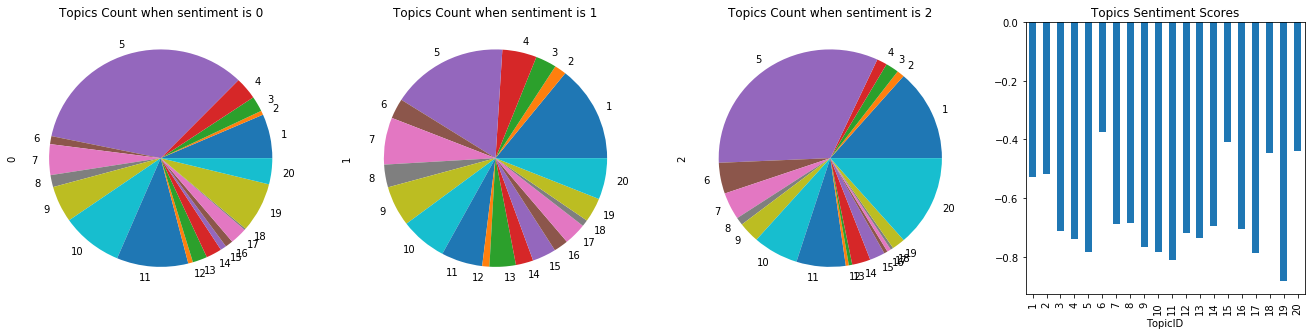

In [19]:
multi_subplot(w=23,h=5,d='pie')

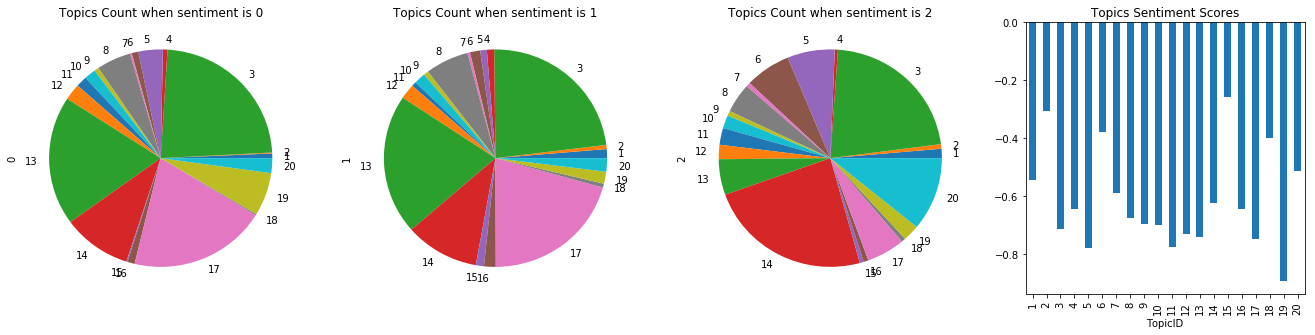

In [20]:
multi_subplot(w=23,h=5,d='pie',dfs=df_topic_sent_news)

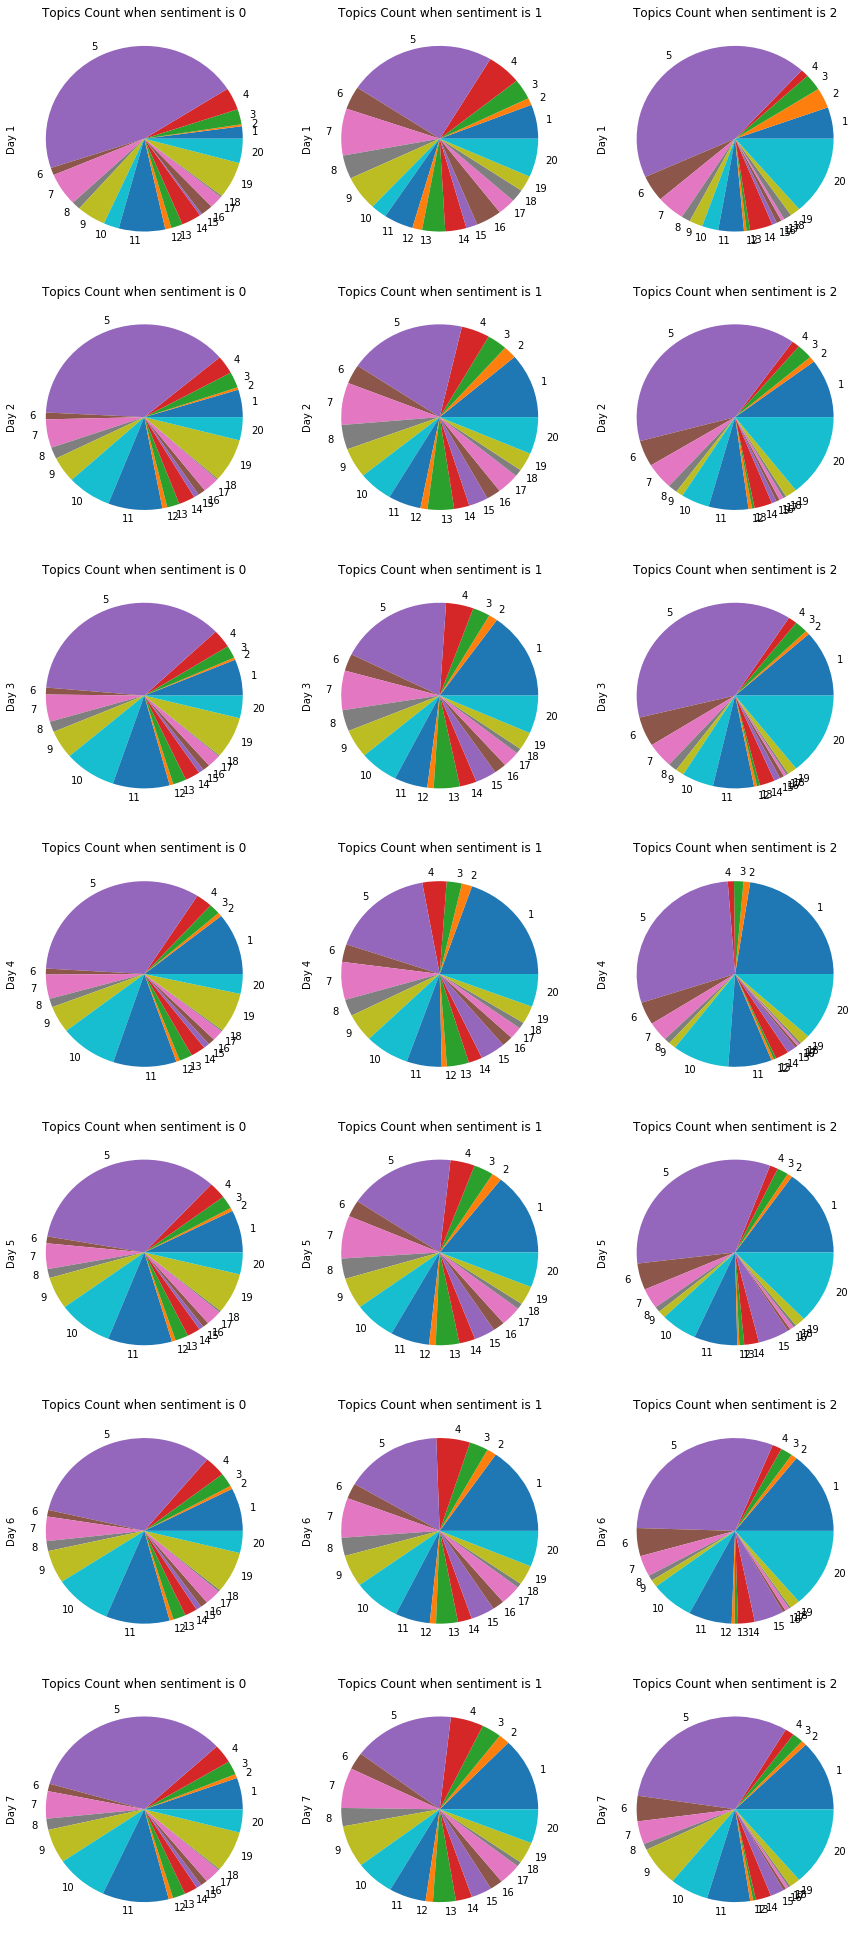

In [21]:
multi_subplot20(w=15,h=35,d='pie',dfs=df_topic_sent)

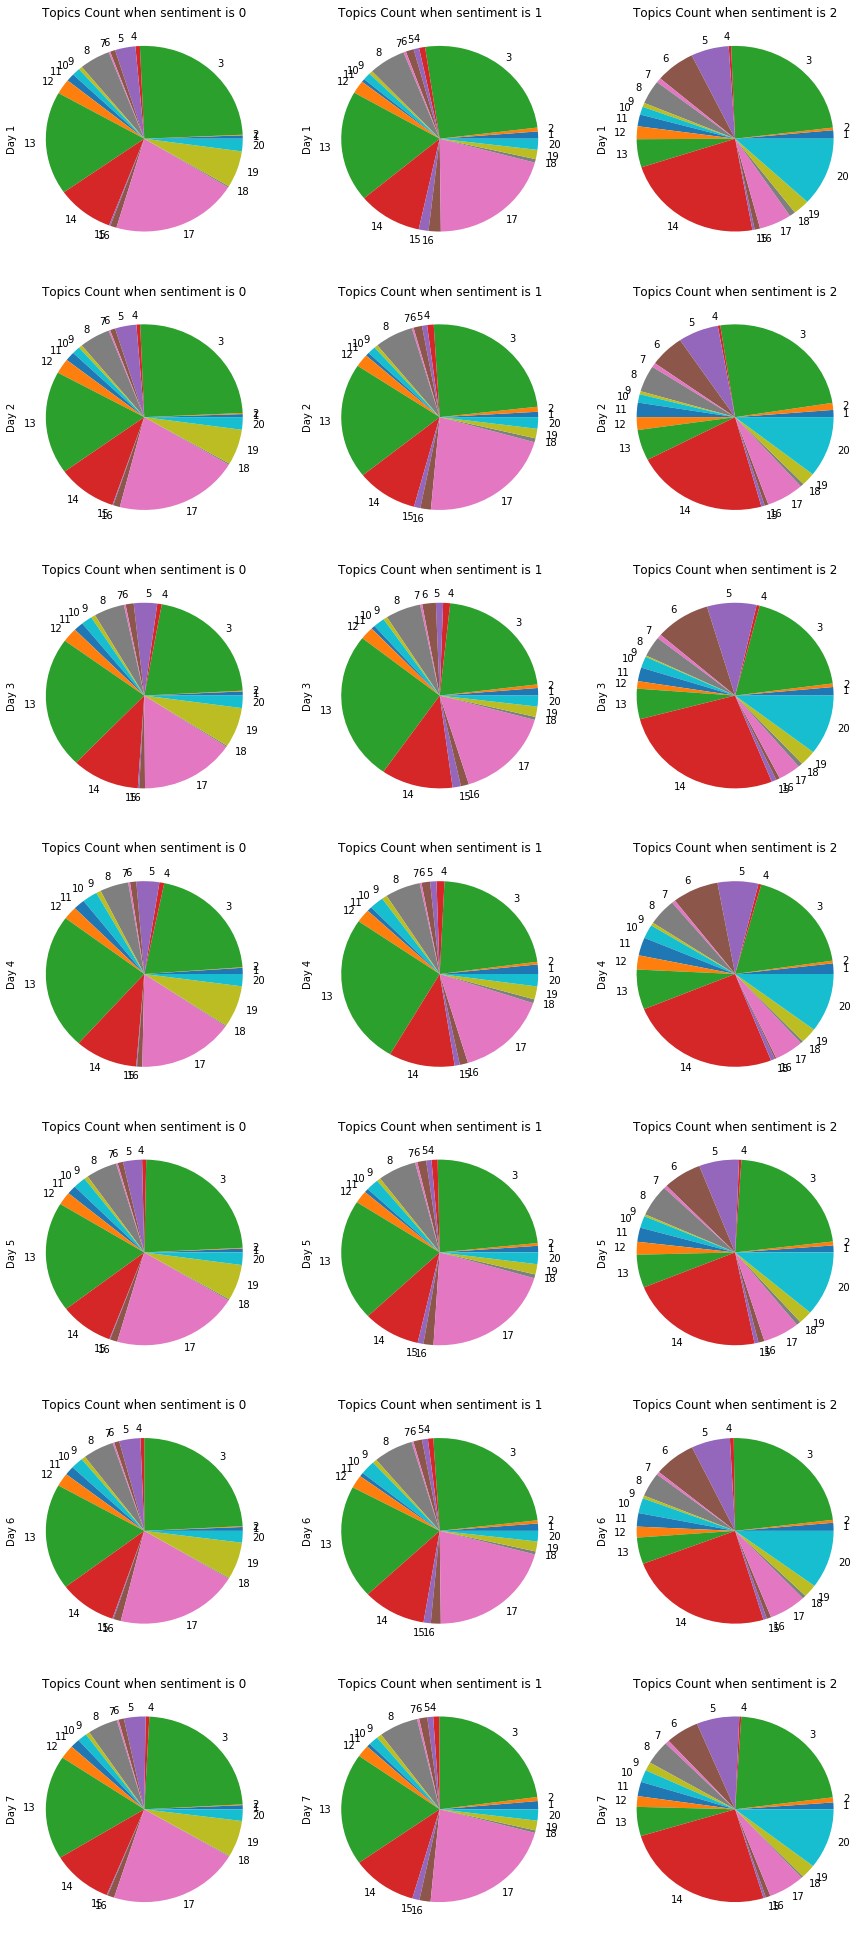

In [22]:
multi_subplot20(w=15,h=35,d='pie',dfs=df_topic_sent_news)

# Data Reduction & Relative Value

In [23]:
df_topic_sent.head(3) # Flat table

TopicID    0    1    2  day  total  TopicScore
0        1  733  308  153   19   1194   -0.485762
1        2  116   63   98   19    277   -0.064982
2        3  902  184   80   19   1166   -0.704974

In [24]:
pd.DataFrame(dict(df_topic_sent.groupby('TopicID').apply(lambda x: list(pd.concat([x[0],x[1],x[2]],axis=1).values))),index=dates).head(3)

1                2                 3                  4   \
19     [733, 308, 153]    [116, 63, 98]    [902, 184, 80]    [1325, 294, 37]   
20  [6520, 2489, 1125]  [582, 484, 107]  [3735, 726, 285]  [4326, 1032, 142]   
21  [9387, 3688, 1409]   [592, 354, 83]  [3249, 698, 260]  [4741, 1098, 179]   

                     5                 6                  7   \
19  [15720, 1259, 1217]   [440, 208, 127]   [1946, 422, 129]   
20  [51863, 4269, 4299]  [1606, 740, 499]  [6747, 1624, 506]   
21  [54326, 4558, 4643]  [1785, 728, 628]  [7042, 1670, 535]   

                  8                  9                   10  \
19    [485, 212, 41]    [1625, 312, 61]      [866, 137, 75]   
20  [2734, 947, 169]  [6071, 1150, 130]   [9891, 1251, 512]   
21  [2731, 898, 180]  [7288, 1199, 169]  [12707, 1556, 635]   

                    11               12                13                14  \
19    [2594, 250, 117]    [341, 83, 12]    [648, 195, 16]  [1105, 180, 104]   
20  [12105, 1189, 717]  [1102, 258, 63]   [2768, 960, 47]  [3639, 555, 321]   
21  [13853, 1327, 821]   [906, 257, 58]  [3251, 1043, 60]  [3643, 674, 302]   

                  15               16               17              18  \
19     [128, 95, 22]   [686, 219, 23]   [753, 152, 15]   [91, 113, 36]   
20   [1141, 708, 88]  [1679, 518, 62]  [3665, 820, 76]  [287, 271, 56]   
21  [1257, 844, 124]  [1762, 493, 86]  [3281, 677, 56]  [290, 223, 45]   

                   19                  20  
19    [2164, 142, 47]    [1441, 346, 383]  
20  [10266, 715, 210]  [5492, 1424, 1587]  
21  [10759, 762, 189]  [5844, 1610, 1756]

In [25]:
#每天的每个sentiment 的所有topic 之和
df_topic_sent.groupby('day').sum().iloc[:,1:4]

0      1      2
day                      
19    34109   5174   2793
20   136219  22130  11001
21   148694  24357  12218
22   159243  25947  15426
23   167694  26924  13866
24   164119  27287  13517
25   145195  25920  13262
26   148427  26631  13542
27   232068  42428  20512
28   128927  22750  11367
29    49133   8600   4522

In [26]:
#每天的每个topic 的三种sentiment之和
pd.DataFrame(dict(df_topic_sent.groupby('TopicID').apply(lambda x: list(x['total']))),index=dates)

1     2     3      4      5     6      7     8      9      10     11  \
19   1194   277  1166   1656  18196   775   2497   738   1998   1078   2961   
20  10134  1173  4746   5500  60431  2845   8877  3850   7351  11654  14011   
21  14484  1029  4207   6018  63527  3141   9247  3809   8656  14898  16001   
22  25700  1670  3787   5498  61588  3067   8956  3266   8875  18353  19144   
23  18354  1514  4918   6100  66487  3412   9968  3702  10961  17812  20316   
24  18399  1490  5040   7514  61720  3260   9364  3824  11067  18617  19686   
25  12882  1600  4556   6327  57430  3249   9256  3793  11417  14986  18326   
26  13313  2065  4727   6664  57884  3298   9450  3895  11756  15691  18548   
27  19808  2666  7406  11194  88326  5019  14753  6225  17318  24739  30084   
28  13717  1160  3207   5969  48122  2689   7489  3001   8717  16939  16211   
29   5879   572  1128   2256  18013  1017   2648  1071   3042   6857   6350   

      12    13    14    15    16    17   18     19     20  
19   436   859  1389   245   928   920  240   2353   2170  
20  1423  3775  4515  1937  2259  4561  614  11191   8503  
21  1221  4354  4619  2225  2341  4014  558  11710   9210  
22  1220  4401  4725  2868  2326  3573  714  12106   8779  
23  1405  4745  4654  2911  2252  5410  831  12951   9781  
24  1407  4424  4357  3193  2542  5392  783  12971   9873  
25  1429  4037  4153  2434  2242  4925  572  11549   9214  
26  1500  4215  4308  2476  2176  5026  569  11832   9207  
27  2180  6688  6670  3666  3329  7820  846  21601  14670  
28  1060  3603  3844  2323  2060  3641  488  10631   8173  
29   371  1435  1396   754   766  1337  138   4407   2818

In [27]:
# 每个topic的每种sentiment一周之和
df_topic_sent.groupby('TopicID').sum().iloc[:,:3].T

TopicID     1     2      3      4       5      6      7      8      9   \
0        99094  9310  34530  49857  514878  18012  69168  26946  81702   
1        36805  4478   7846  12876   43797   7703  18023   8716  15422   
2        17965  1428   2512   1963   43049   6057   5314   1512   4034   

TopicID      10      11     12     13     14     15     16     17    18  \
0        135349  156776  10389  32036  34578  13188  17083  37433  3362   
1         17562   15454   2680   9845   6535   8914   5464   8441  2469   
2          8713    9408    583    655   3517   2930    674    745   522   

TopicID      19     20  
0        111487  58650  
1          9298  15820  
2          2517  17928

In [28]:
def getRatio(df_topic_sent):
    sent_day,sent_topic = {},{}
    for sent in range(3):
        sent_day[sent] = pd.DataFrame(dict(df_topic_sent.groupby('TopicID').apply(lambda x: list(x[sent]))),index=dates).T
        for d in dates:
            sent_day[sent][d] = sent_day[sent][d]/df_topic_sent.groupby('day').sum().iloc[:,1:4][sent][d] 
                                                #在当天所有相同sentiment 下的和（aggregate topic）
        sent_topic[sent] = pd.DataFrame(dict(df_topic_sent.groupby('TopicID').apply(lambda x: list(x[sent]))),index=dates)
        for t in range(1,21):
            sent_topic[sent][t] = sent_topic[sent][t]/df_topic_sent.groupby('TopicID').sum().iloc[:,sent][t] 
                                        #在一周所有相同sentiment下的和(aggregate day)
    return sent_day,sent_topic

In [29]:
def ratioSent(df_topic_sent):
    sent_day,sent_topic = getRatio(df_topic_sent)
    plt.figure(figsize=(22, 14))
    for sent in range(3):
        plt.subplot(f'23{sent+1}')
        plt.plot(sent_day[sent].T)
#         plt.ylim(0,0.32)
        plt.legend(range(1,21),loc='best')
        plt.title(f'Trends of Sentiment {sent} (daily ratio in the same day)') # 每个日期上的点和为1
        plt.subplot(f'23{sent+4}')
        plt.plot(sent_topic[sent])
#         plt.ylim(0,0.36)
        plt.legend(range(1,21),loc='best')
        plt.title(f'Trends of Sentiment {sent} (daily ratio in the same topic)')#每条topic线条和为1

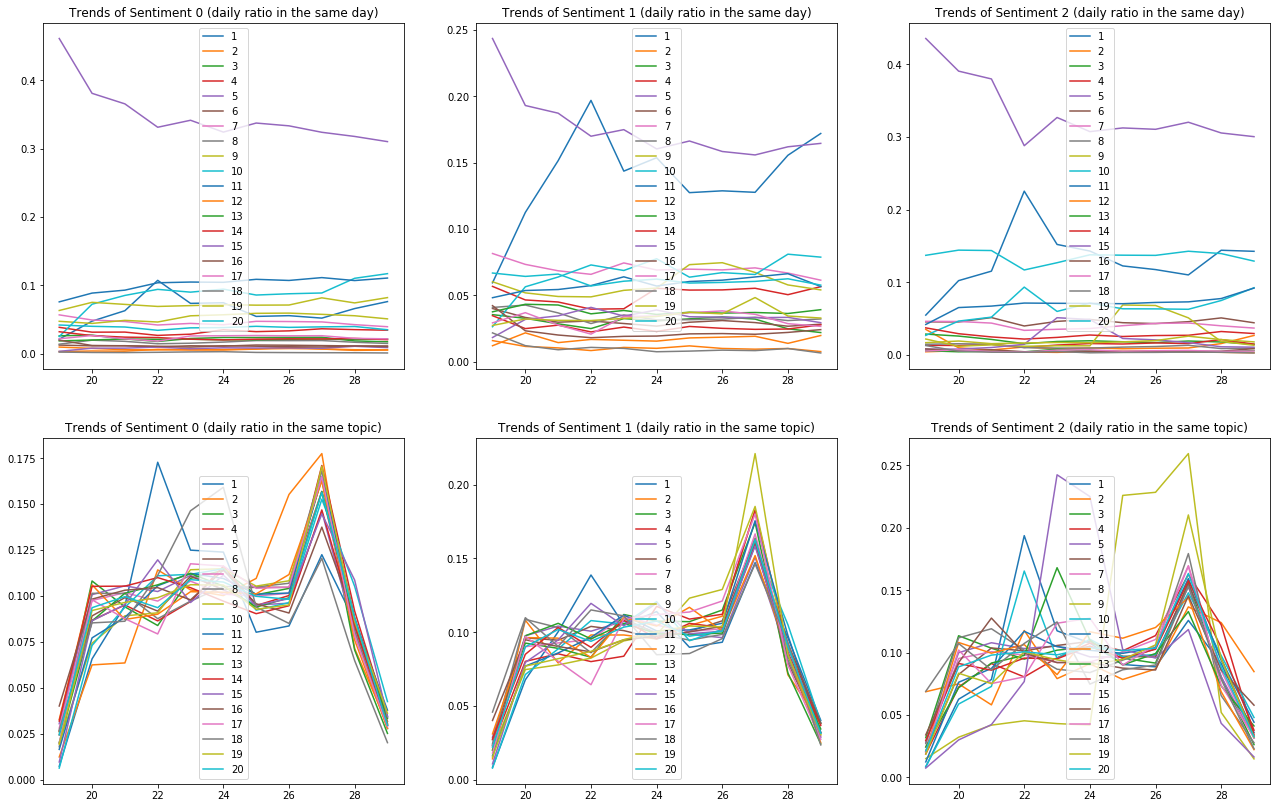

In [30]:
ratioSent(df_topic_sent)

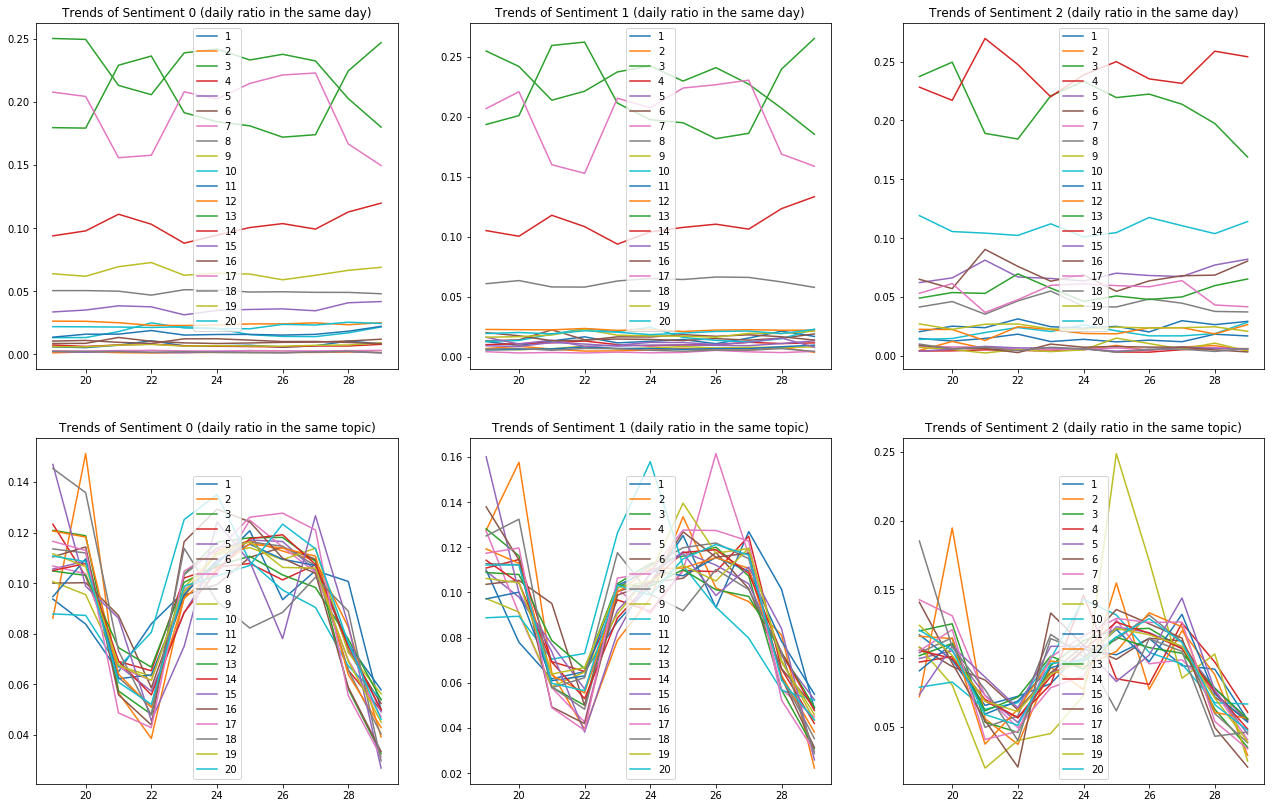

In [31]:
ratioSent(df_topic_sent_news)

In [32]:
def multi_subplot_sentRatio(w=25,h=25,dfs=df_topic_sent,ratio=0,maxy='0.38'):
    plt.figure(1,figsize=(w, h))
    t=1
    for i in range(5):
        for j in range(4):
            plt.subplot2grid((5,4), (i,j))
            for sent in range(3):
                if ratio==0:
                    getRatio(dfs)[ratio][sent].loc[t,:].plot(ylim=(0,maxy))
                else:
                    getRatio(dfs)[ratio][sent].T.loc[t,:].plot(ylim=(0,maxy))
#                     plt.xticks(range(11),dates,rotation=0)
            plt.legend(['Neg','Neu','Pos'],loc='best')
            plt.title('Sentiment Ratio of Topic '+ str(t))
            t += 1

In [33]:
def topicDailySent(dfs=df_topic_sent):
    plt.figure(figsize=(25, 7))
    for i in range(3):
        sents = dict(dfs.groupby('TopicID').apply(lambda x: list(x[i])))
        count = pd.DataFrame(sents)
        plt.subplot(f'14{i+1}')
        plt.plot(count)
        plt.xticks(range(11),dates,rotation=0)
        plt.legend(range(1,21),loc='best')
        plt.title(f'Sentiment {i} Count against date of each topcis')
    plt.subplot('144')
    plt.plot(pd.DataFrame(dict(dfs.groupby('TopicID').apply(lambda x: list(x['TopicScore'])))))
#     plt.ylim(-0.85,-0.2)
    plt.xticks(range(11),dates,rotation=0)
    plt.legend(range(1,21),loc='best')
    plt.title('Sentiment Score against date of each topcis')

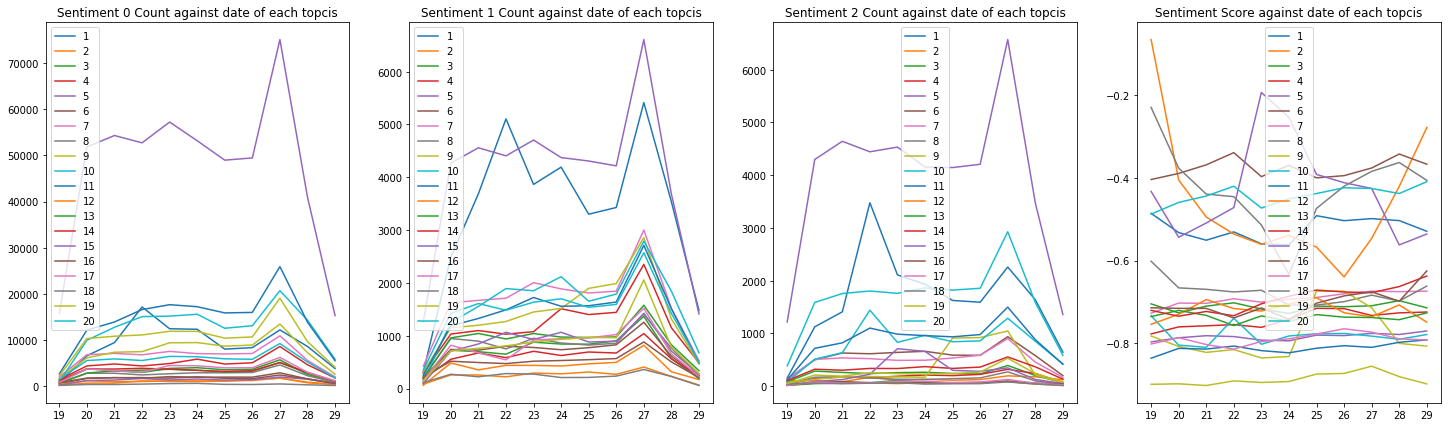

In [34]:
topicDailySent(df_topic_sent)

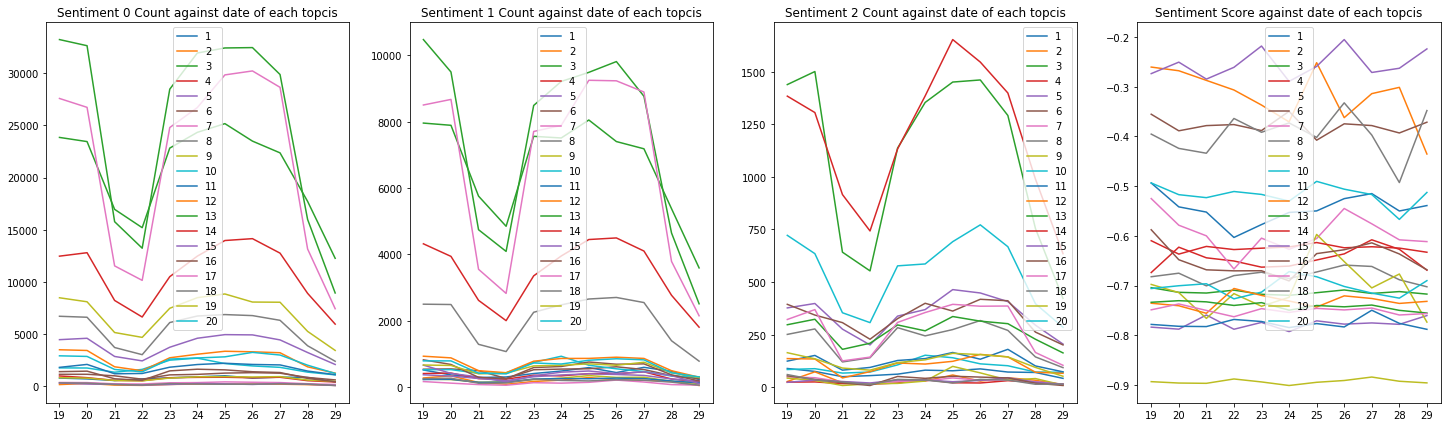

In [35]:
topicDailySent(df_topic_sent_news)

# Sentiment trends against each topic

In [36]:
def multi_subplot_sent(w=15,h=12,dfs=df_topic_sent):
    plt.figure(1,figsize=(w, h))
    t=1
    for i in range(5):
        for j in range(4):
            plt.subplot2grid((5,4), (i,j))
#             plt.subplot(f'54{(t+1)}') #不能超过9个
            for s in range(3):
                pic= pd.Series(dfs.groupby('TopicID').apply(lambda x: list(x[s]))[t]).plot()
#                 pic.set_ylim([0,90000])
            plt.legend(['Neg','Neu','Pos'],loc='best')
            plt.xticks(range(11),dates,rotation=0)
            plt.title('Sentiment Trend of Topic '+ str(t))
            t += 1

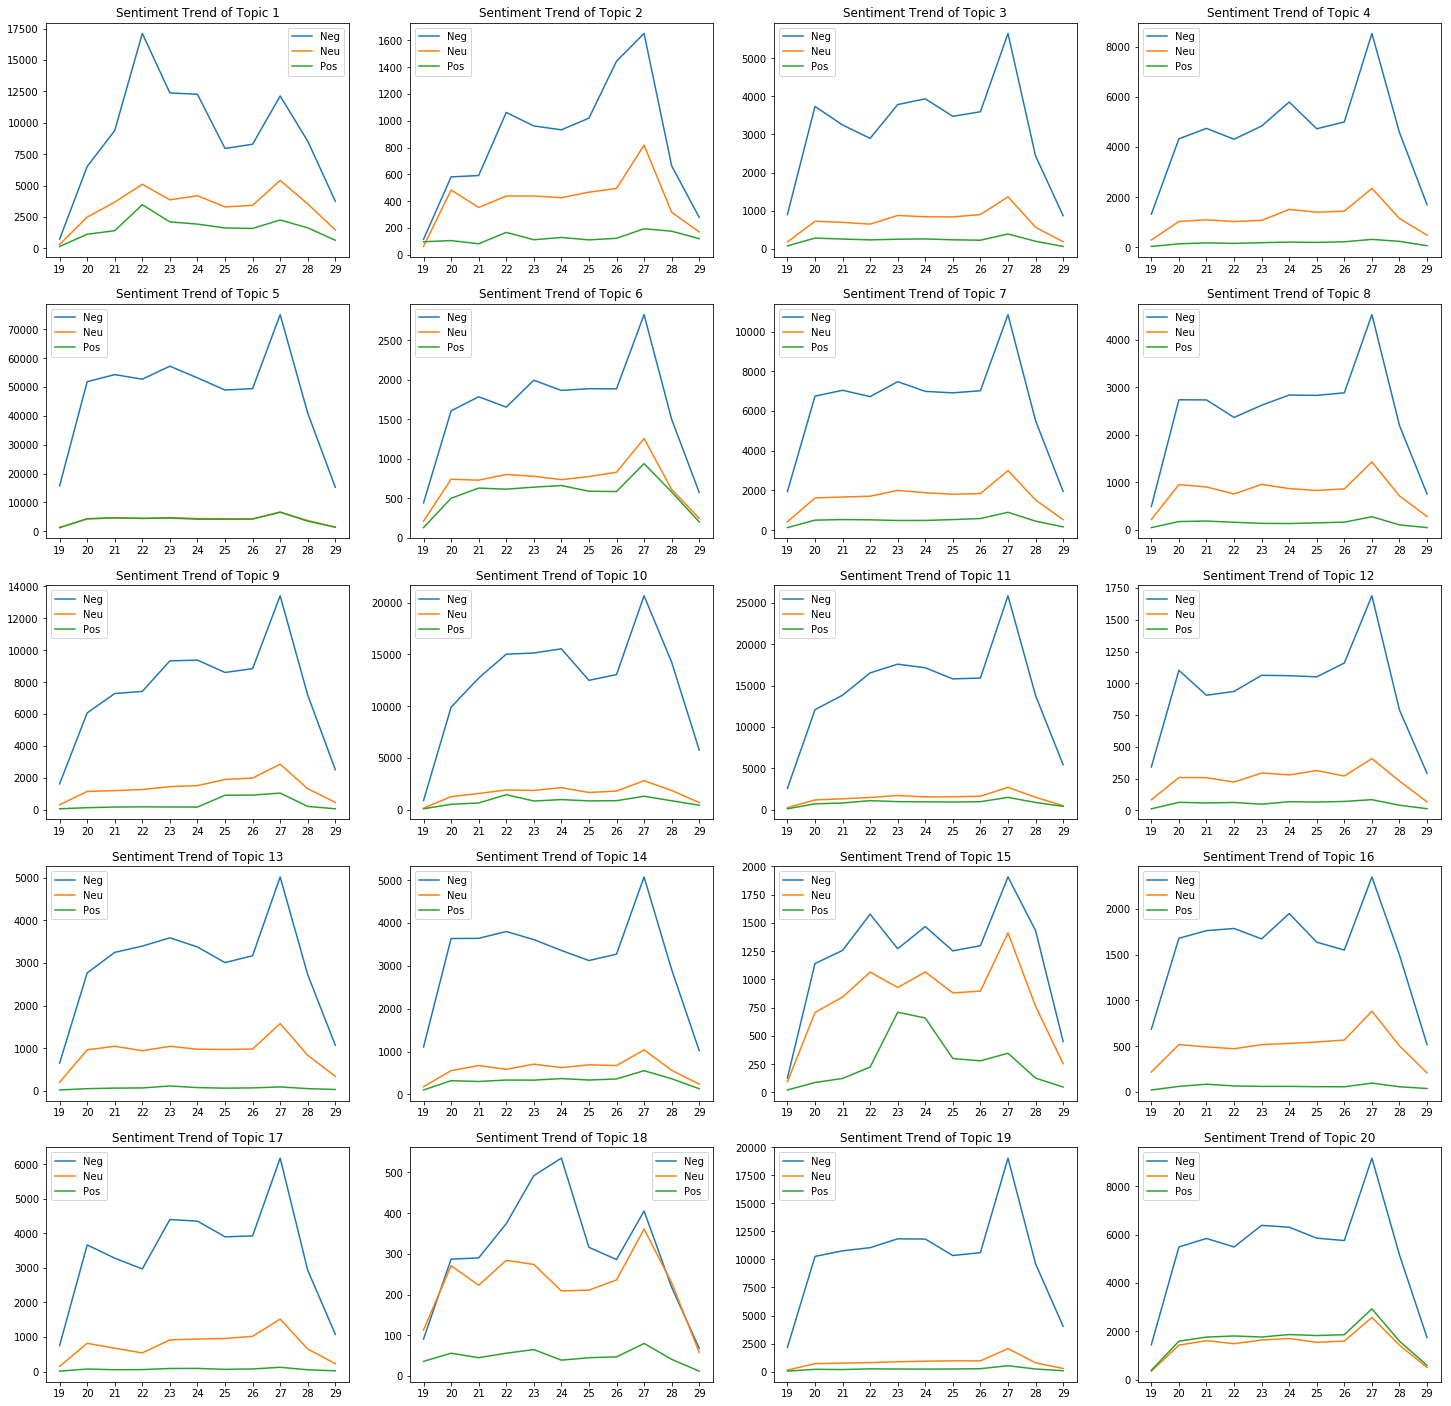

In [37]:
multi_subplot_sent(w=25,h=25,dfs=df_topic_sent)

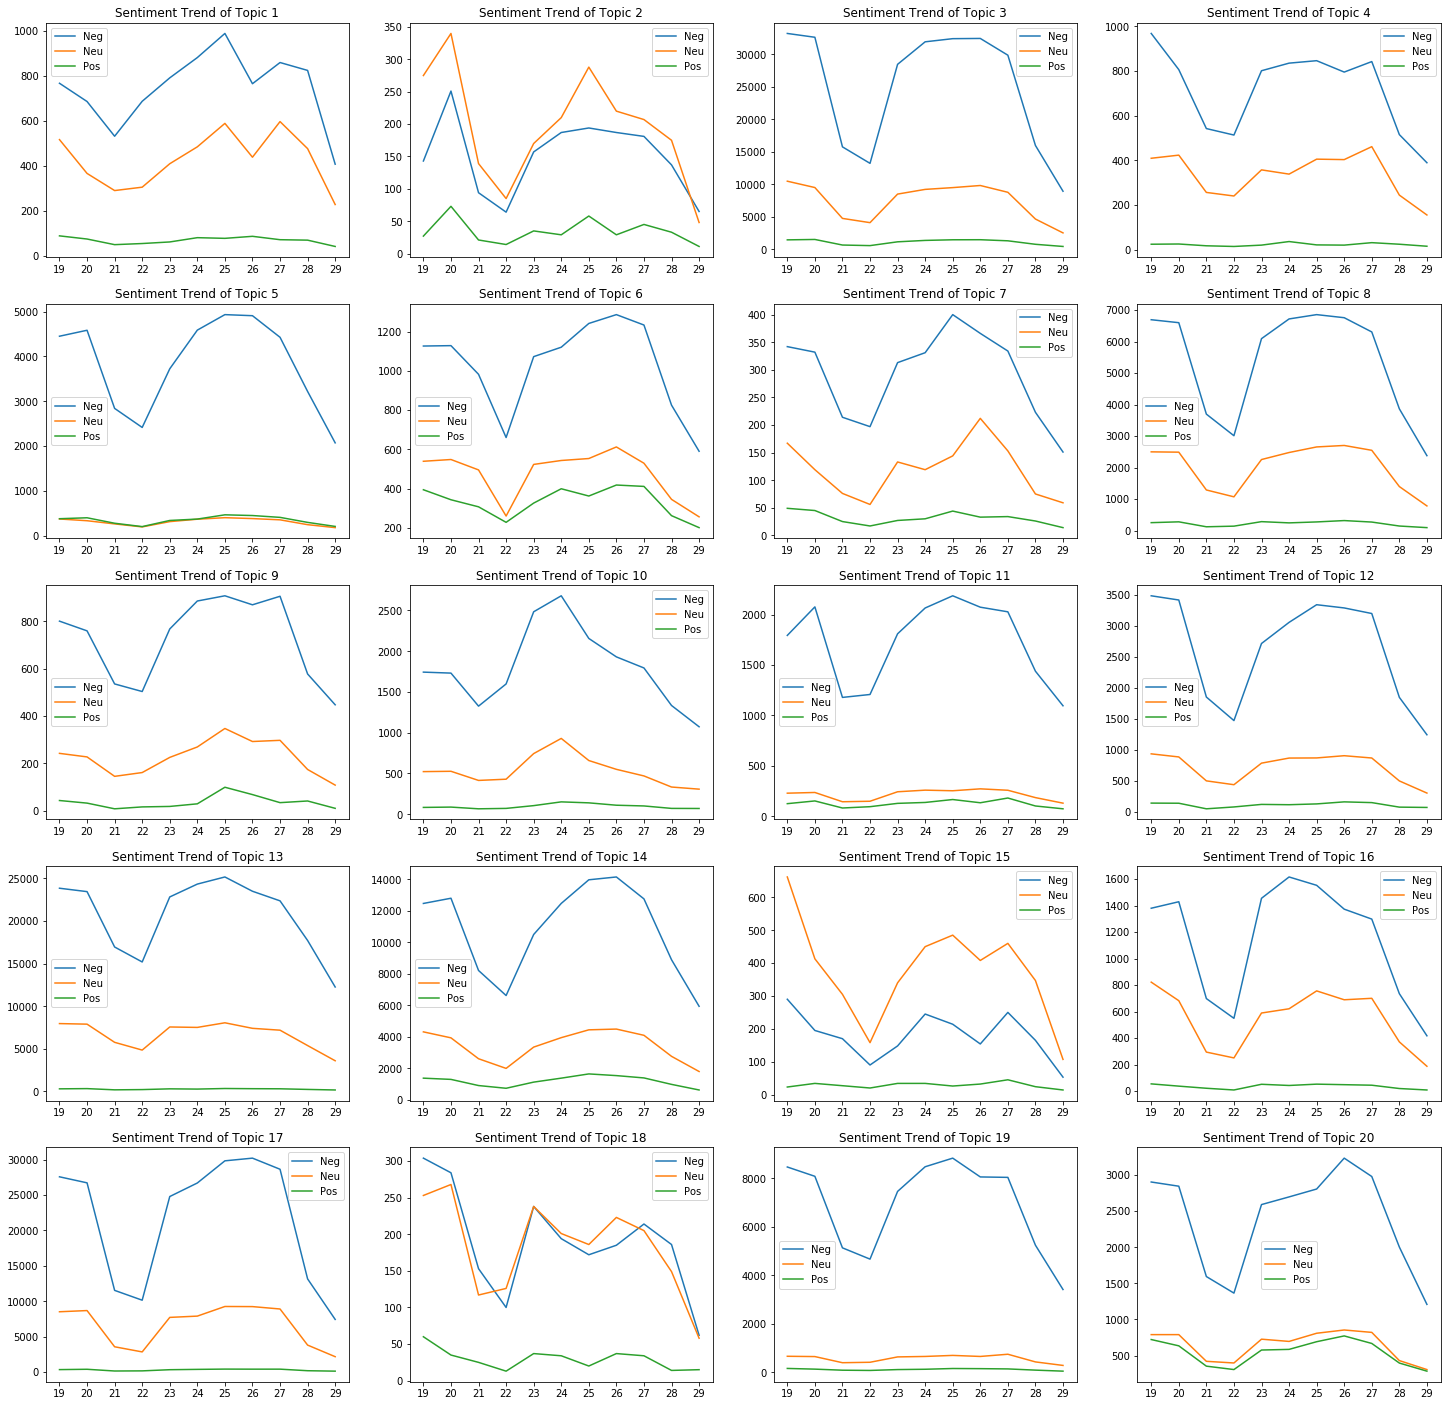

In [38]:
multi_subplot_sent(w=25,h=25,dfs=df_topic_sent_news)

## Relative value: Ratio based on Topics
For each sentiment in each day, all the values of each topics add up to 1

纵坐标上所有点和为1

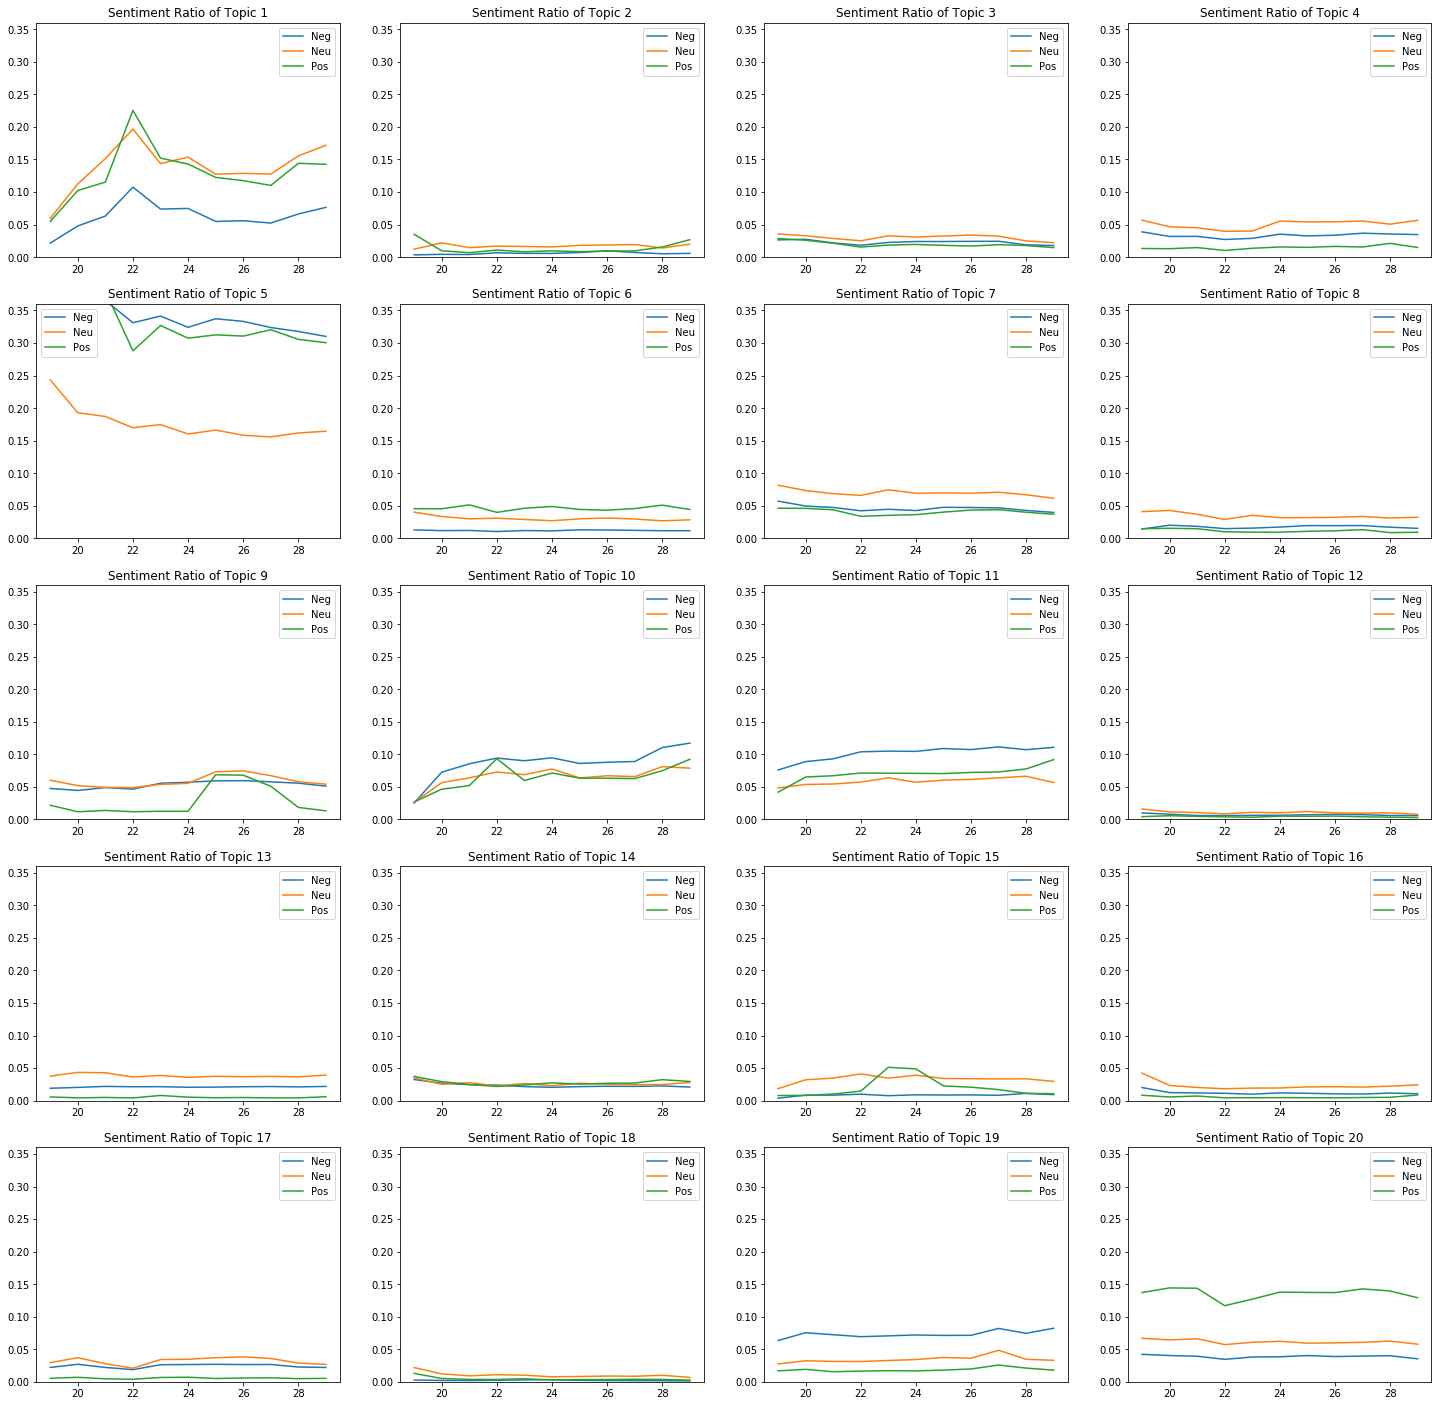

In [39]:
multi_subplot_sentRatio(dfs = df_topic_sent,maxy=0.36)

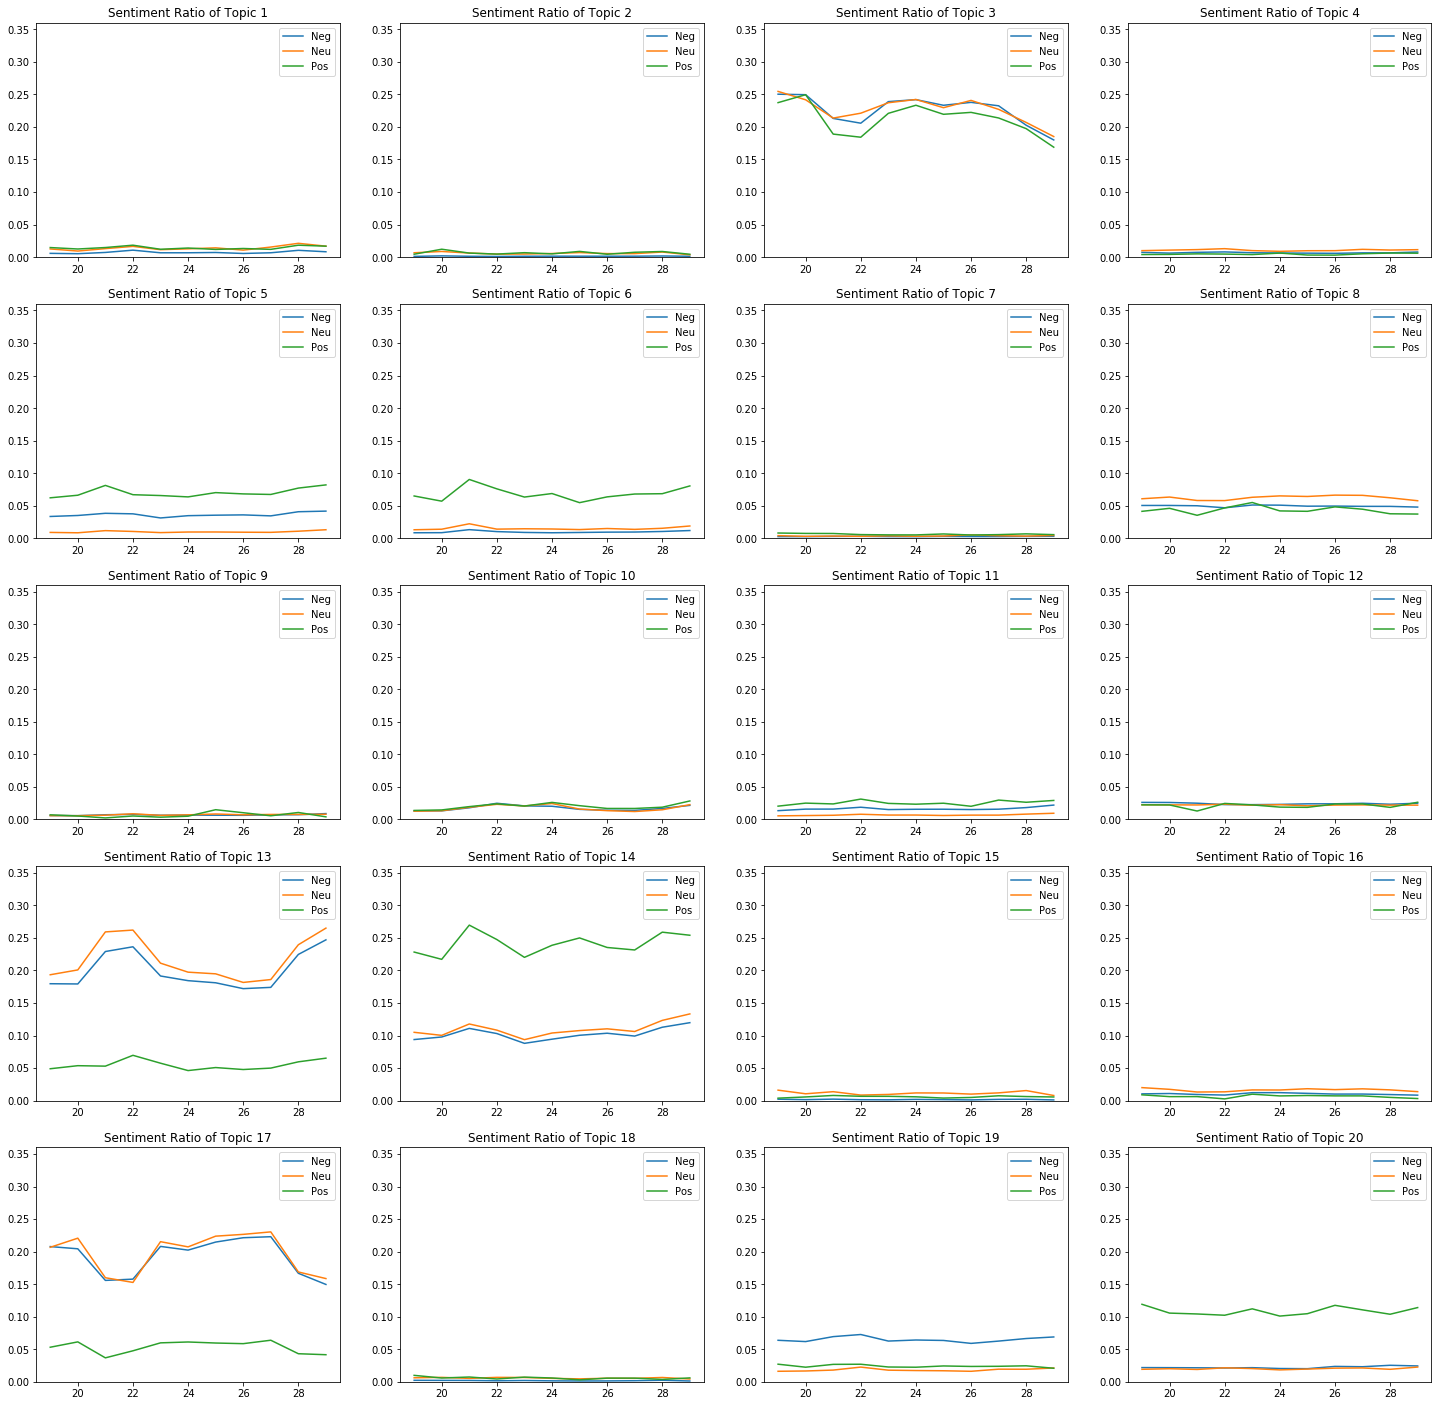

In [40]:
multi_subplot_sentRatio(dfs = df_topic_sent_news, maxy=0.36)

## Relative values: Ratio based on date
For each sentiment in each topic, all the one-week value add up to 1
一条线上所有点和为1

sentiment折线趋近于数量曲线

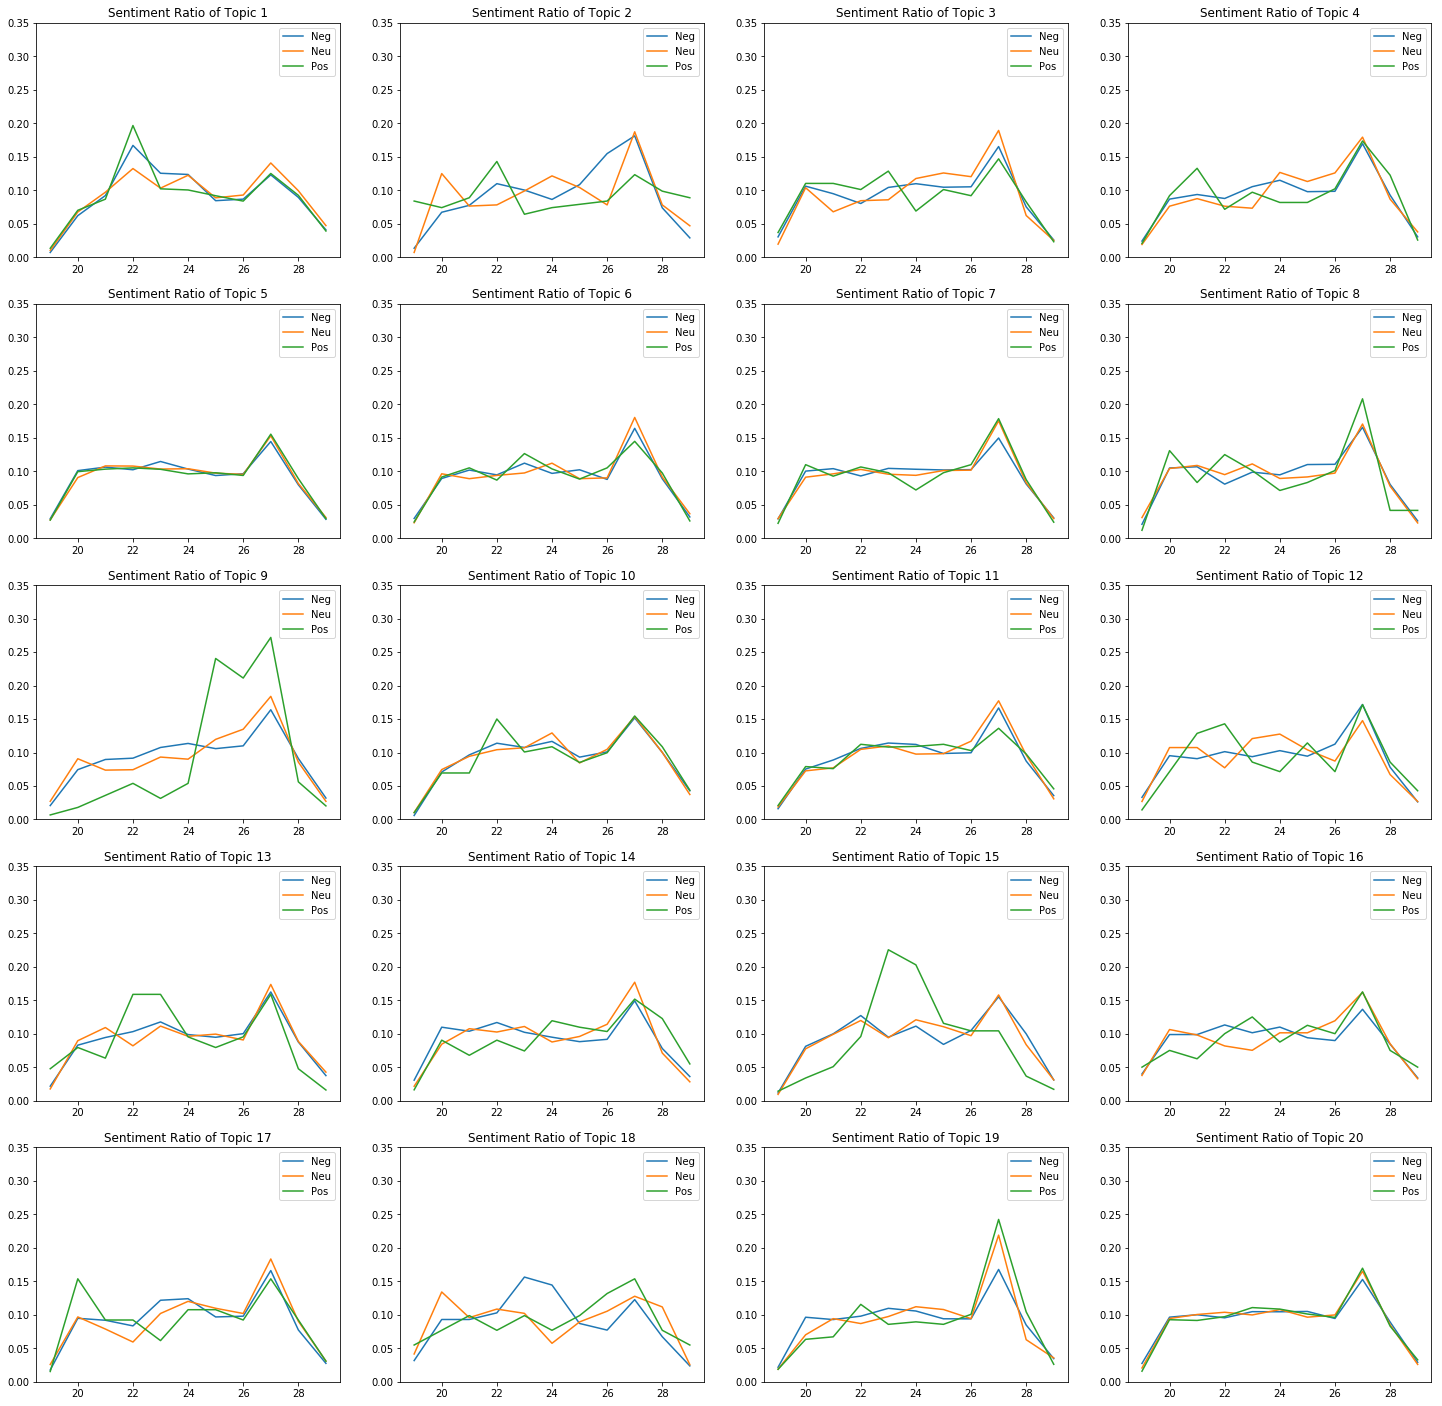

In [43]:
multi_subplot_sentRatio(w=25,h=25,dfs=df_topic_sent,ratio=1,maxy=0.35)

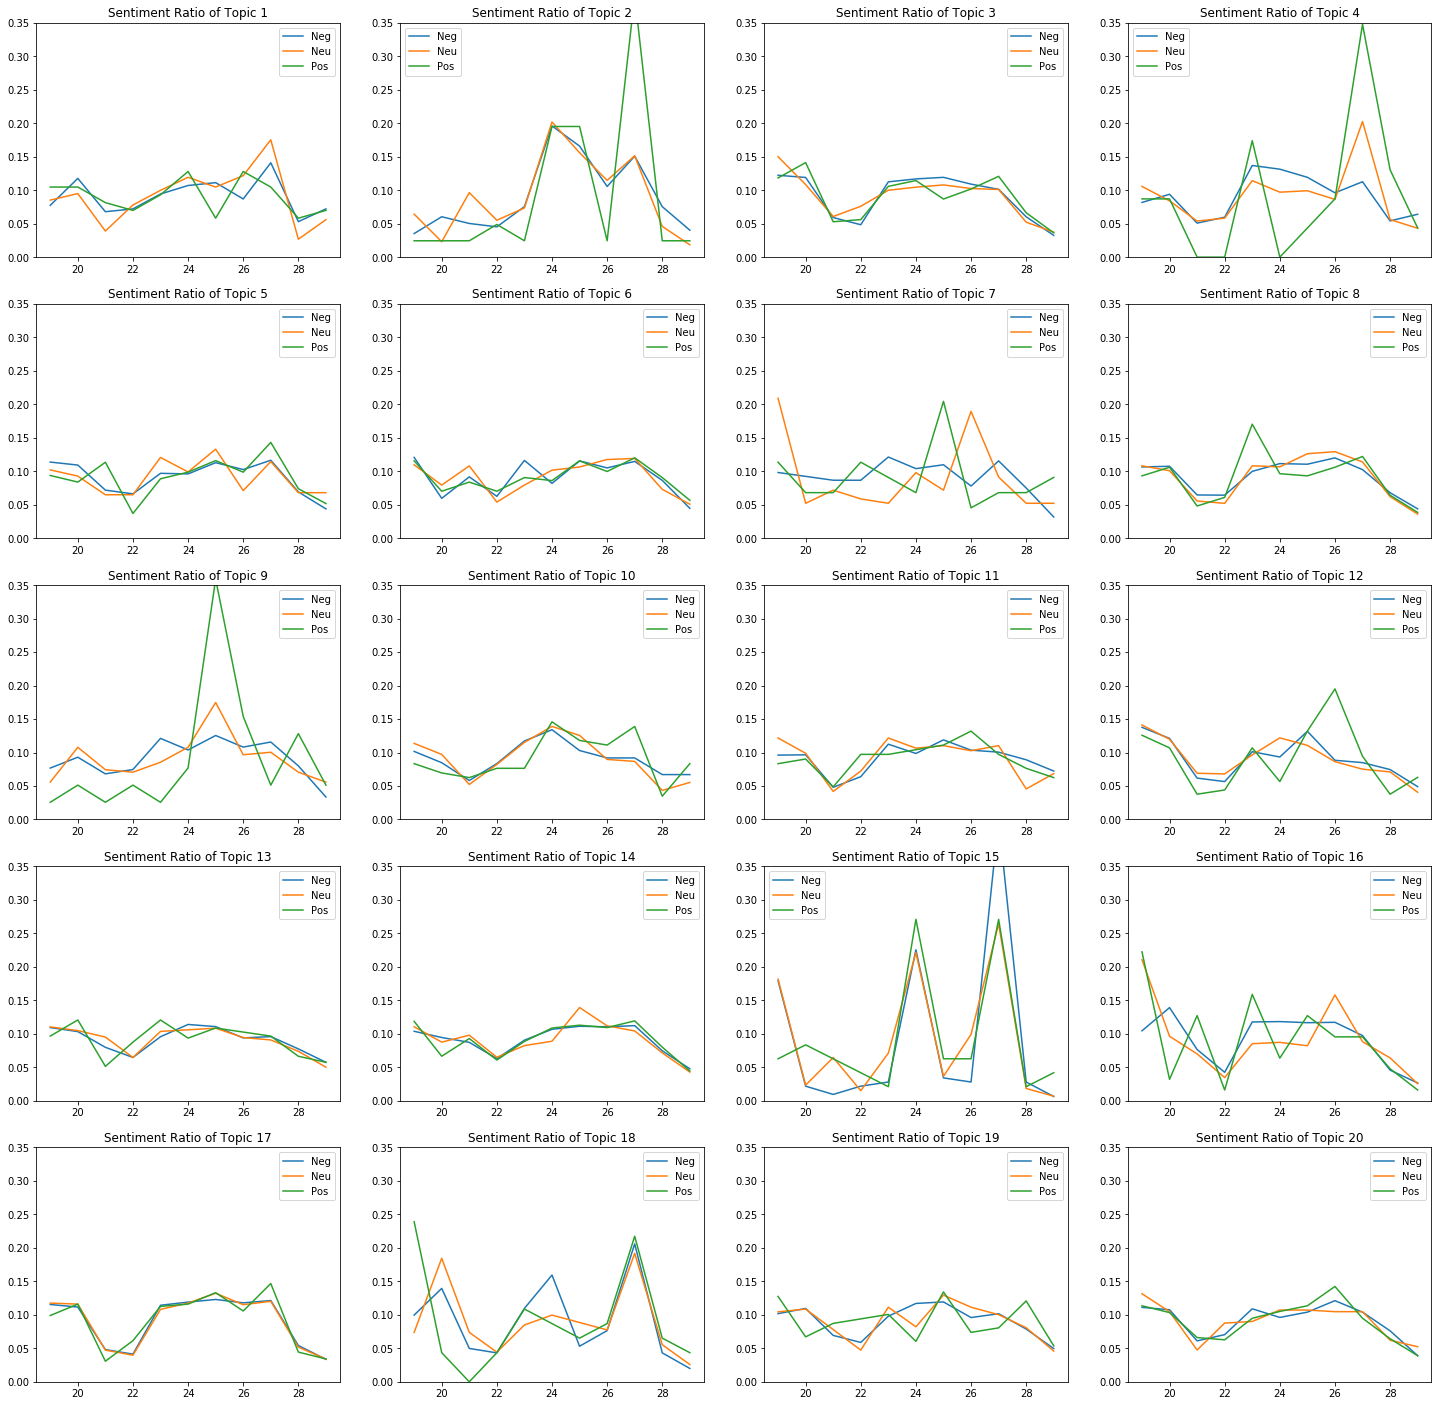

In [44]:
multi_subplot_sentRatio(w=25,h=25,dfs=df_topic_sent_news,ratio=1,maxy=0.35)

## Sentiment Score

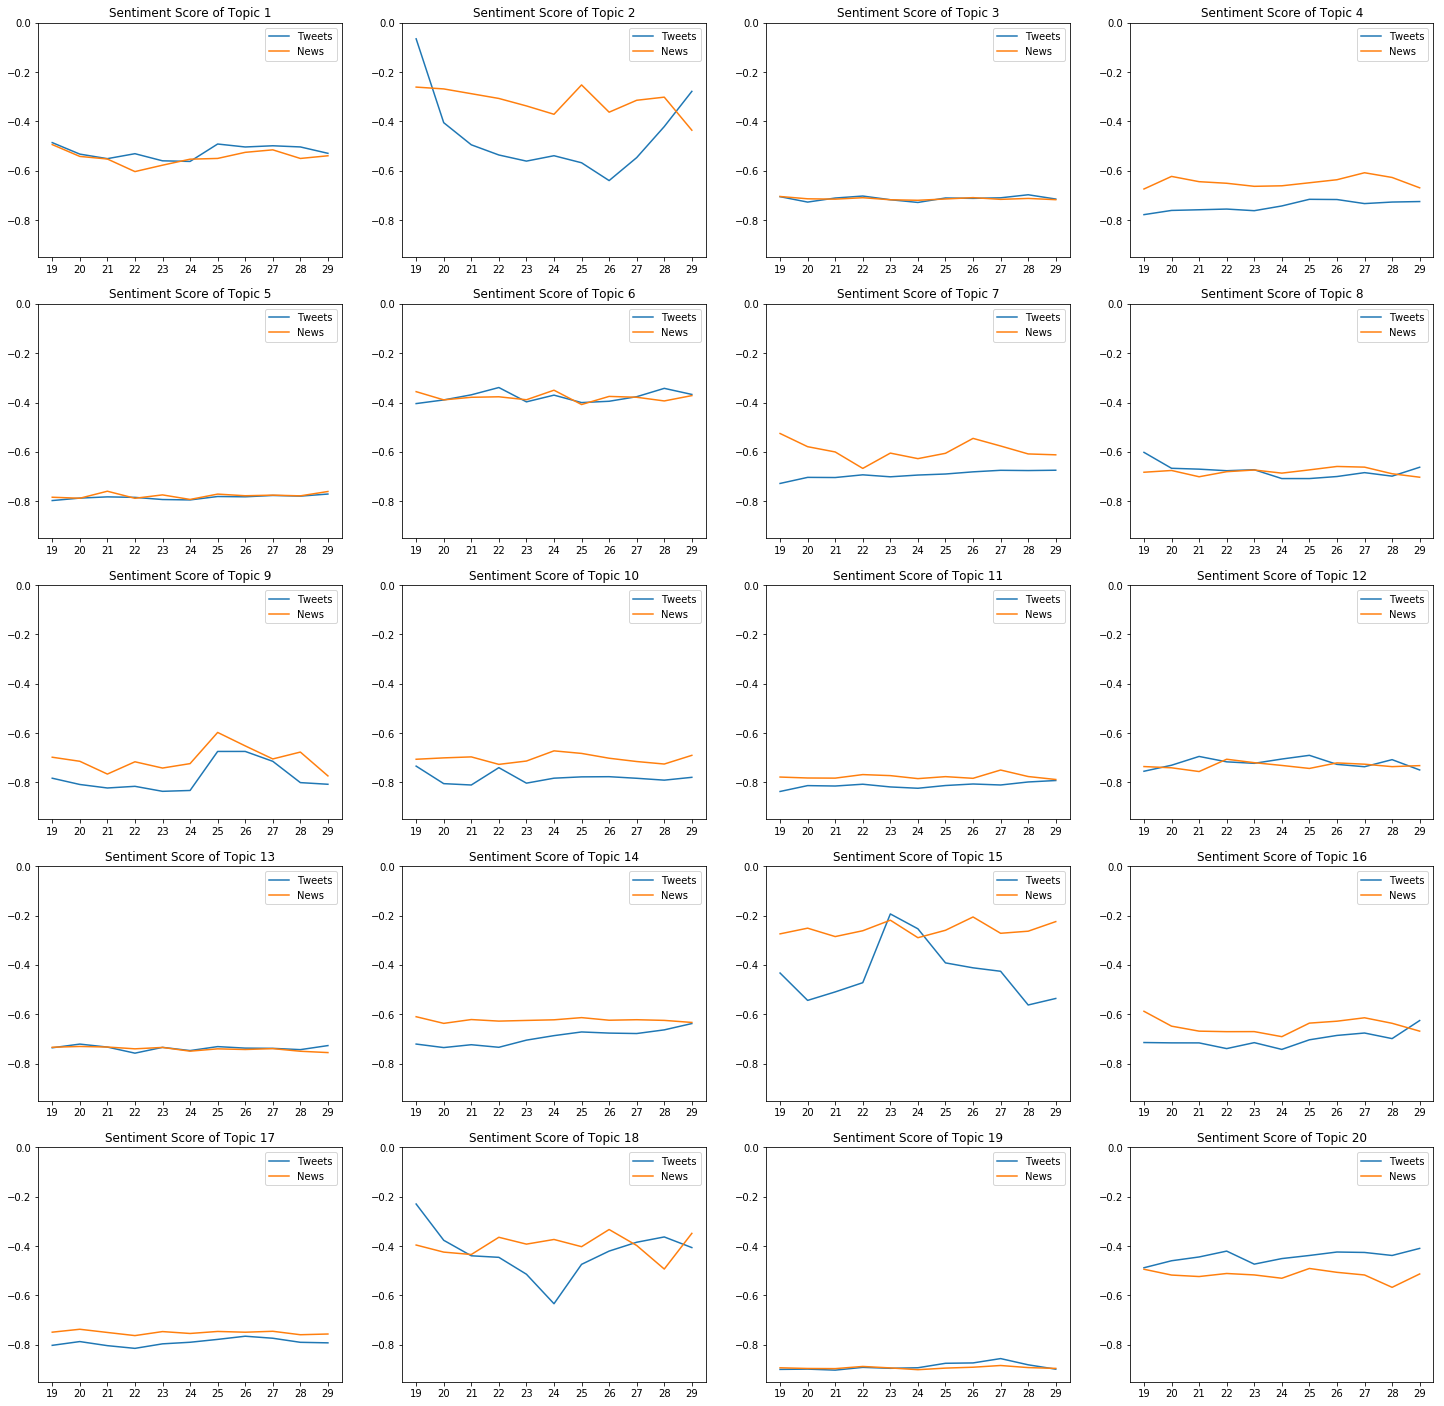

In [44]:
def multi_subplot_sent_score(w=15,h=12):
    plt.figure(1,figsize=(w, h))
    t=1
    for i in range(5):
        for j in range(4):
            plt.subplot2grid((5,4), (i,j))
#             plt.subplot(f'54{(t+1)}') #不能超过9个
            pd.Series(df_topic_sent.groupby('TopicID').apply(lambda x: list(x['TopicScore']))[t]).plot(ylim=(-0.95,0))
            pd.Series(df_topic_sent_news.groupby('TopicID').apply(lambda x: list(x['TopicScore']))[t]).plot()
            plt.legend(['Tweets','News'],loc='best')
            plt.xticks(range(11),dates,rotation=0)
#             pic.set_ylim([-0.85,-0.2]) #若适用plt.plot(xx)则不能适用该属性
            plt.title('Sentiment Score of Topic '+ str(t))
            t += 1
multi_subplot_sent_score(w=25,h=25)

# 10% news & 60% tweets